## Decision Tree

In [1]:
from sklearn import tree
X = [[0,0],[1,1]]
Y = [0,1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)

In [2]:
clf.predict([[2.,2.]])

array([1])

In [3]:
clf.predict_proba([[2.,2.]])

array([[0., 1.]])

In [4]:
from sklearn.datasets import load_iris
X, Y = load_iris(return_X_y = True)
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,Y)


[Text(0.5, 0.9166666666666666, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.4230769230769231, 0.75, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.5769230769230769, 0.75, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.3076923076923077, 0.5833333333333334, 'x[2] <= 4.95\ngini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.15384615384615385, 0.4166666666666667, 'x[3] <= 1.65\ngini = 0.041\nsamples = 48\nvalue = [0, 47, 1]'),
 Text(0.07692307692307693, 0.25, 'gini = 0.0\nsamples = 47\nvalue = [0, 47, 0]'),
 Text(0.23076923076923078, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.46153846153846156, 0.4166666666666667, 'x[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [0, 2, 4]'),
 Text(0.38461538461538464, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.5384615384615384, 0.25, 'x[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'),
 Text(0.46153846153846156, 0.08333333333333333, 'gini

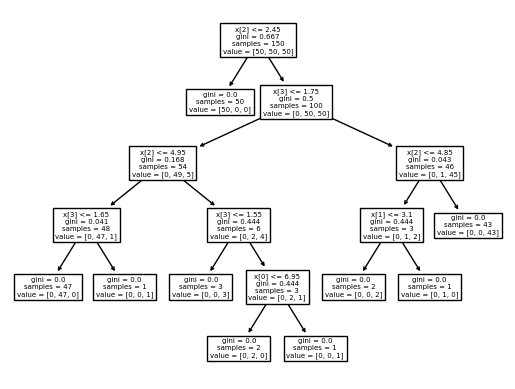

In [5]:
tree.plot_tree(clf)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.8, random_state=42)

In [7]:
n_nodes = clf.tree_.node_count
children_left = clf.tree_.children_left
children_right = clf.tree_.children_right
feature = clf.tree_.feature
threshold = clf.tree_.threshold
values = clf.tree_.value


node_indicator = clf.decision_path(X_test)
leaf_id = clf.apply(X_test)
sample_id = 0
node_index = node_indicator.indices[
node_indicator.indptr[sample_id] : node_indicator.indptr[sample_id + 1]
]
print("Rules used to predict sample {id}:\n".format(id=sample_id))
for node_id in node_index:
    if leaf_id[sample_id] == node_id:
        continue
    if X_test[sample_id, feature[node_id]] <= threshold[node_id]:
        threshold_sign = '<='
    else:
        threshold_sign = '>'
    print(
        "decision node {node} : (X_test[{sample}, {feature}] = {value}) "
        "{inequality} {threshold}".format(
            node=node_id,
            sample=sample_id,
            feature=feature[node_id],
            value=X_test[sample_id, feature[node_id]],
            inequality=threshold_sign,
            threshold=threshold[node_id],
        )
    )

Rules used to predict sample 0:

decision node 0 : (X_test[0, 2] = 4.7) > 2.449999988079071
decision node 2 : (X_test[0, 3] = 1.2) <= 1.75
decision node 3 : (X_test[0, 2] = 4.7) <= 4.950000047683716
decision node 4 : (X_test[0, 3] = 1.2) <= 1.6500000357627869


In [8]:
print(n_nodes)


17


In [9]:
print(children_left)


[ 1 -1  3  4  5 -1 -1  8 -1 10 -1 -1 13 14 -1 -1 -1]


In [10]:
print(children_right)


[ 2 -1 12  7  6 -1 -1  9 -1 11 -1 -1 16 15 -1 -1 -1]


In [11]:
print(feature)


[ 2 -2  3  2  3 -2 -2  3 -2  0 -2 -2  2  1 -2 -2 -2]


In [12]:
print(threshold)

[ 2.44999999 -2.          1.75        4.95000005  1.65000004 -2.
 -2.          1.55000001 -2.          6.94999981 -2.         -2.
  4.85000014  3.10000002 -2.         -2.         -2.        ]


In [13]:
print(values)

[[[0.33333333 0.33333333 0.33333333]]

 [[1.         0.         0.        ]]

 [[0.         0.5        0.5       ]]

 [[0.         0.90740741 0.09259259]]

 [[0.         0.97916667 0.02083333]]

 [[0.         1.         0.        ]]

 [[0.         0.         1.        ]]

 [[0.         0.33333333 0.66666667]]

 [[0.         0.         1.        ]]

 [[0.         0.66666667 0.33333333]]

 [[0.         1.         0.        ]]

 [[0.         0.         1.        ]]

 [[0.         0.02173913 0.97826087]]

 [[0.         0.33333333 0.66666667]]

 [[0.         0.         1.        ]]

 [[0.         1.         0.        ]]

 [[0.         0.         1.        ]]]


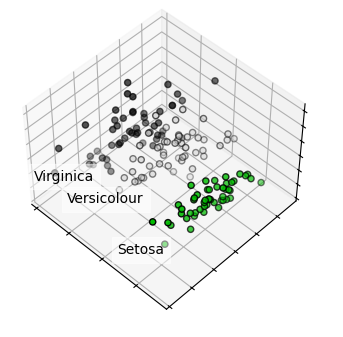

In [14]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
import numpy as np
from sklearn import datasets, decomposition

np.random.seed(5)

iris = datasets.load_iris()
X = iris.data
y = iris.target

fig=plt.figure(1, figsize = (4,3))
plt.clf()

ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])


plt.cla()
pca = decomposition.PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [("Setosa", 0), ("Versicolour", 1), ("Virginica", 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean() + 1.5,
        X[y == label, 2].mean(),
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral, edgecolor="k")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.show()

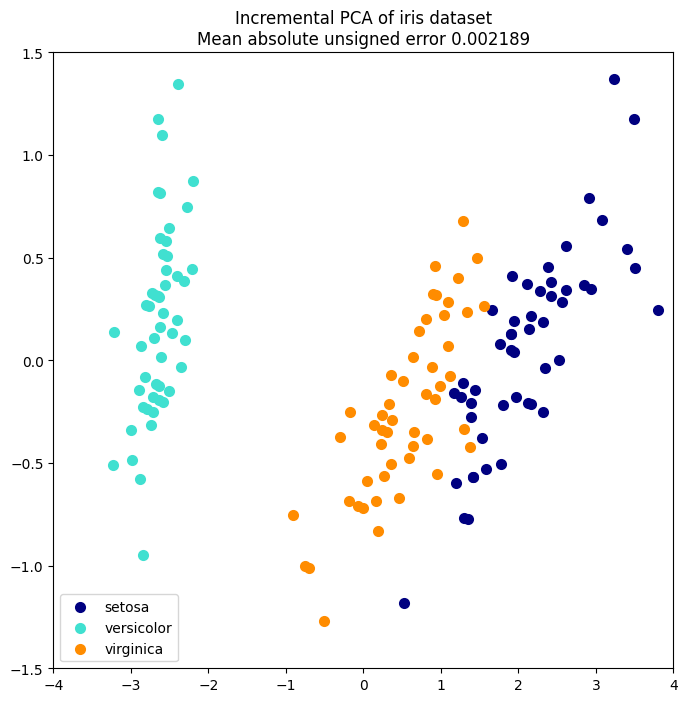

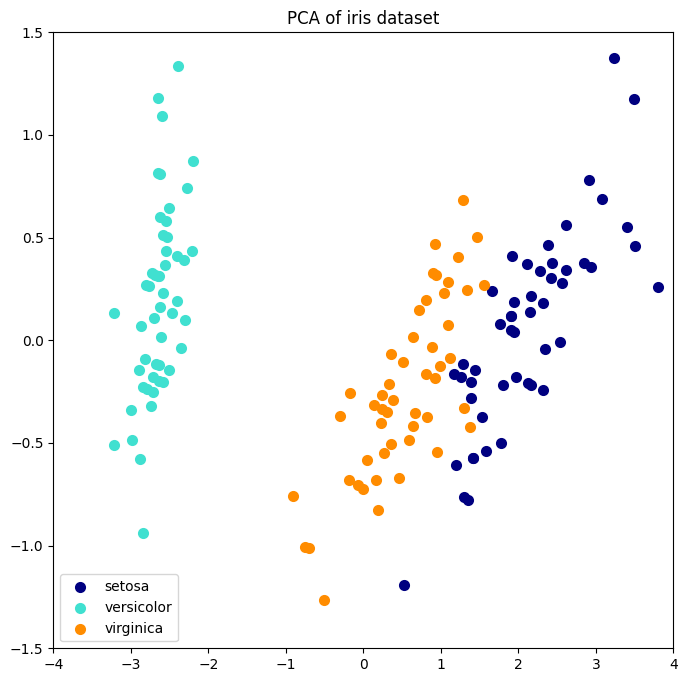

In [15]:
from sklearn.decomposition import PCA, IncrementalPCA
n_components = 2
ipca = IncrementalPCA(n_components= n_components, batch_size = 10)
X_ipca = ipca.fit_transform(X)
pca= PCA(n_components = n_components)
X_pca = pca.fit_transform(X)
colors = ["navy", "turquoise", "darkorange"]

for X_transformed, title in [(X_ipca, "Incremental PCA"), (X_pca, "PCA")]:
    plt.figure(figsize=(8,8))
    for color, i, target_name in zip(colors, [0,1,2], iris.target_names):
        plt.scatter(
            X_transformed[y == i, 0],
            X_transformed[y == i, 1],
            color = color,
            lw = 2,
            label = target_name
        )
    if "Incremental" in title:
        err = np.abs(np.abs(X_pca) - np.abs(X_ipca)).mean()
        plt.title(title + " of iris dataset\nMean absolute unsigned error %.6f" % err)
    else:
        plt.title(title + " of iris dataset")
    plt.legend(loc="best", shadow=False, scatterpoints=1)
    plt.axis([-4, 4, -1.5, 1.5])

plt.show()
        

In [16]:
column_name = ['CRIM', 'ZIN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [17]:
import pandas as pd
df = pd.read_csv(r"C:\Users\uSER\Downloads\housing.csv", header=1)
df.columns = column_name
df

,CRIM,ZIN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
1,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
3,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
4,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
500,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
501,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
502,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [18]:
X = df[['CRIM', 'ZIN','INDUS','CHAS','NOX','RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','B','LSTAT']].values
Y = df[['MEDV']]
pca = decomposition.PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [19]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X,Y)

LinearRegression()

In [20]:
model.predict(X)

array([[30.62111407],
       [28.66748837],
       [28.00093811],
       [25.33151871],
       [23.06655309],
       [19.60384984],
       [11.56561588],
       [18.99031003],
       [19.05824161],
       [21.66679351],
       [20.93313566],
       [19.59236853],
       [19.33534839],
       [19.33230684],
       [20.54050619],
       [16.94546069],
       [16.18682529],
       [18.44379701],
       [12.55769312],
       [17.71557593],
       [15.85881833],
       [13.84232688],
       [15.7203461 ],
       [13.4263805 ],
       [15.51054049],
       [14.7404961 ],
       [19.59269749],
       [20.91410527],
       [11.47773131],
       [18.11676058],
       [ 8.79906446],
       [14.3210906 ],
       [13.73399786],
       [23.86555191],
       [22.38147218],
       [23.13927979],
       [22.92672322],
       [31.34352157],
       [34.19594852],
       [28.01435484],
       [25.20858463],
       [24.60750984],
       [22.96780738],
       [22.11948831],
       [20.42900805],
       [18

In [21]:
model.score(X,Y)

0.7417650108167995

## Interview Coding Round Question

#### String is immutable

In [22]:
str = "Hello"
print(id(str))
str = "Hello"
print(id(str))
str = "Hello1"
print(id(str))


1924072580288
1924072580288
1923725588640


#### List is mutable

In [23]:
list1 = [10,20,30]
print(id(list1))
list1 = [10,20,30,40,50]
print(id(list1))

1923933610048
1923933611776


#### Tuple is Immutable

Id always changes

In [24]:
tuple_var = (10,20,30)
print(tuple_var,id(tuple_var))
tuple_var += (10,)
print(tuple_var, id(tuple_var))
tuple_var = (10,20,30,40,50)
print(tuple_var, id(tuple_var))

(10, 20, 30) 1923985731200
(10, 20, 30, 10) 1924090925584
(10, 20, 30, 40, 50) 1923969976576


In [25]:
def sample_func(sample_arg):
    sample_arg.append(10)

sample_list = [7,8,9]
sample_func(sample_list)
print(sample_list)

[7, 8, 9, 10]


In [26]:
tuple_var = tuple()
tuple_var.__sizeof__()


24

In [27]:
tuple_var = (1,2,3)
tuple_var.__sizeof__()


48

In [28]:
list_var = list()
list_var.__sizeof__()

40

In [29]:
list_var.append(1)
list_var.__sizeof__()

72

In [30]:
list_var.append(2)
list_var.__sizeof__()

72

In [31]:
list_var

[1, 2]

#### List Copy

In [32]:
old_list = [1,2]
old_list.append(3)
old_list


[1, 2, 3]

In [33]:
id(old_list)

1923986775232

In [34]:
old_list.__sizeof__()

104

In [35]:
new_list = list(old_list)
new_list

[1, 2, 3]

In [36]:
id(new_list)

1924097180800

In [37]:
new_list.__sizeof__()

72

#### Tuple Copy

In [41]:
old_tuple = (1,2)
print(id(old_tuple))
print(old_tuple.__sizeof__())
new_tuple = tuple(old_tuple)
print(id(new_tuple))
print(new_tuple.__sizeof__())

1924098284544
40
1924098284544
40


#### Positional argument

In [44]:
def sum(a,b,c=10):
    return a+b+c
sum(10,12,c=12)

34

#### F  String 

In [46]:
a,b = 10,20
print(f"Sum of a and b is {a+b}")
print(f"Value of c is {(c := a+b)}")

Sum of a and b is 30
Value of c is 30


#### Generator

```python

dataset = [
    "keyword one",
    "another keyword",
    "keyword two",
    "some random text",
    "keyword three",
    "more keywords here",
    "keyword four"
]

def search_result(keyword):
    while keyword in dataset:
        yield matched_data

search_object = search_result('keyword')
search_object.__next__()

In [55]:
while True:
    try:
        x = int(input("Please enter a number: "))
        break
    except ValueError:
        print("Oops! That was no valid number.   Try again...")

Please enter a number:  a


Oops! That was no valid number.   Try again...


Please enter a number:  10


In [56]:
class B(Exception):
    pass

class C(B):
    pass

class D(C):
    pass

for cls in [B,C,D]:
    try:
        raise cls()
    except D:
        print("D")
    except C:
        print("C")
    except B:
        print("B")

B
C
D


In [60]:
class B(C):
    pass

class C(B):
    pass

class D(Exception):
    pass

for cls in [B,C,D]:
    try:
        raise cls()
    except B:
        print("B")
    except C:
        print("C")
    except D:
        print("D")

B
B
D


In [63]:
try:
    raise Exception('spam', 'eggs')
except Exception as inst:
    print(type(inst))   
    print(inst.args)    
    print(inst)         
    x, y = inst.args    
    print('x =', x)
    print('y =', y)

<class 'Exception'>
('spam', 'eggs')
('spam', 'eggs')
x = spam
y = eggs


In [64]:
def divide(x,y):
    try:
        result = x/y
    except ZeroDivisionError:
        print("Can not divide by zero")
    else:
        print("Result= ",result)
    finally:
        print("Executing final Clause")

divide(1,2)
divide(1,0)
divide('a', 'b')

Result=  0.5
Executing final Clause
Can not divide by zero
Executing final Clause
Executing final Clause


TypeError: unsupported operand type(s) for /: 'str' and 'str'